# Assesment of Geolocation data impact on Housing Prices in King County, WA

## 1. Introduction

### 1.1. Backgound

Housing costs are impacting individuals, families, businesses, and governments weighing over their budgets. The global Housing market is generally moving <br>  in sync with overall economy but its different pieces may grow at different rates. Prices in some geographical locations move much faster than in others. <br> Prices may vary drastically within the same city depending on the neighborhood. The problem of accurate and timely real estate quote is yet to be solved with <br> some online real estate aggregators such as Zillow have been developing proprietary systems that provide automated estimates of housing prices  without <br> the immediate need of professional appraiser [1]. These models utilize the property features i. e. number of bedrooms/bathrooms, square footage and etc as <br> well as location features, i. e. proximity to different venues such as entertainment, education, transport, health care, parks, etc. All available open source <br> datasets contain about the same number of implicit parameters, which are static by nature. Geographic parameters are less standardized and definitely more <br> dynamic. This makes their assessment a more difficult and exciting problem. 

### 1.2. Business problem

The goal of this project to build a predictive model for the housing prices based on the available information for King County, Washington. The impact of <br> geographical location through proximity to various venues to be analyzed, and the question whether the predictive outcome of the model could be improved to <br> be assessed. 


## 2. Data acquisition and cleaning

### 2.1. Data sources

# The following datasets are used in building and evaluating the prediction models.
- https://www.kaggle.com/harlfoxem/housesalesprediction/downloads/housesalesprediction.zip contains house sale prices for King County, WA, which includes  Seattle. This dataset includes Zip Code, latitide and longutude for each sale. This list was used as a starting point dataset.
- http://ciclt.net contains a table to convert Zip Codes into City/Town names and was web-scraped to improve naming convention.
- Foursquare Places API was used to access the number of bars/restaurants, parks, schools, etc within a 1 km radius from a given house location. The number of  nearby venues was used as a proxy measure of the geographical location quality.

### 2.2. Data cleaning

The www.kaggle.com data formed the initial housing prices data frame for this project as it is the largest dataset out of the listed above. All duplicate entries in the data frame were removed. There were some missing price values, therefore those rows were removed permanently. The City/Town names were added to a table by matching  the properties' Zip Codes. 

Using provided coordinates of each house sold, the number of nearby venues within a 1 km radius from the property locations were added to the table using Foursquare  Places API. The list of venues consisted of shops, cafes, restaurants, bars, parks, bus/train stops, schools, hospitals and others. 

Also, due to daily limitations on Foursquare API requests only about 700 records were used from the initial dataset.  

### 2.3. Feature selection

After data cleaning, there were 698 entries with price information and 18 additional numerical features in the dataset. Upon examining the meaning of each feature,   it became clear that there was some redundancy in the features. For example, sqft_living was simply a total of sqft_above and sqft_basement. Surprisingly out of all the venues, only Outdoors & Recreations (a broad category which includes gyms, parks, etc) indicated any significant correlation (~ 0.22) with home prices. All other  categories indicated correlation of less than 0.10. 
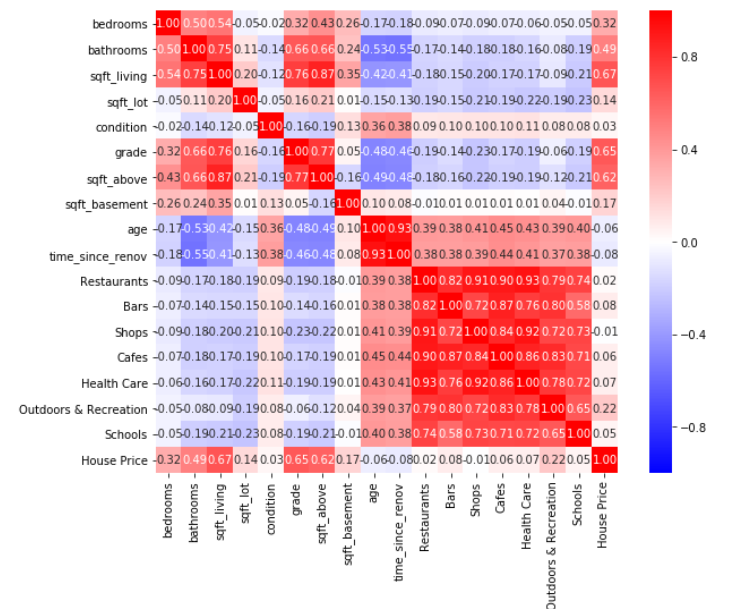
   

## 3. Methodology

### 3.1. Models

Four models that are different in the subsets of features were tested.

- Model All Stats. This model included the initial numerical features without any venue information. The performance of this model provided the baseline against  which the other models can be compared to.

- Model Selected Stats. Redundant or weakly correlated to House Price variables such as __sqft_lot, sqft_basement, age, condition__ were removed from this  model to illustrate what happens when removing the redundant features: despite an intuition, the model performance got worse.

- Model All Stats & All Venues. Here, all venue features were added in addition to the features used in model Selected Stats.

- Model All Stats & Selected Venues. Here, only information on the number of outdoor facilities was added to the baseline model. This is a relatively simple model, with all obvious redundancies removed.

In this project, linear regression models using these feature sets were built and characterized.

### 3.2. Exploratory data analysis

The success of the linear regression models depends on the amount of correlation between the predicting values and the features.
 
The scatter plot below explores the correlation between the home price and number of bedrooms and bathrooms. 
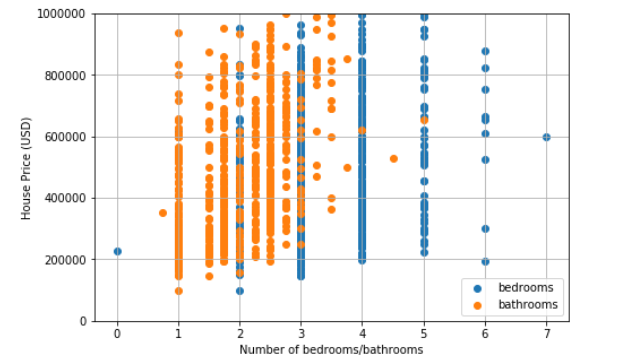

While the correlation between the number of bedrooms/bathrooms and the home price is expected (the more the higher price is), these <br> seem to be poor predictors of the price just on their own: the price varies significantly within any number of bedrooms/bathrooms.

The scatter plots below explore the correlation between the home price and the house living area and property lot size.


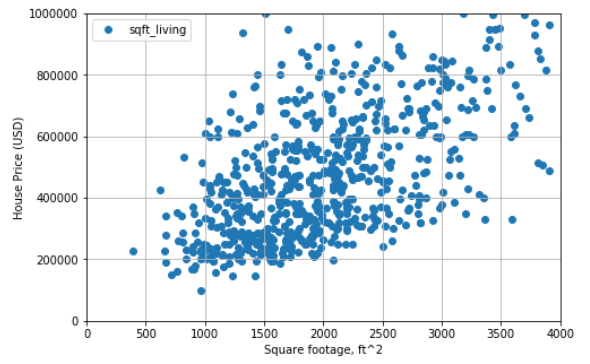

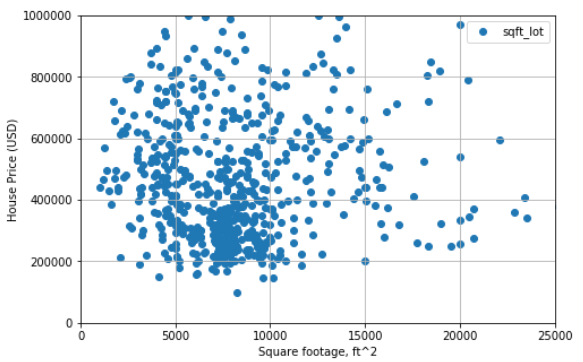

Clearly and not surprisingly, there is a significant amount of correlation between living area and home price, but almost none between home price and lot size. 

The scatter plot below explores the correlation between the home prices and the the number of nearby venues of different types. 

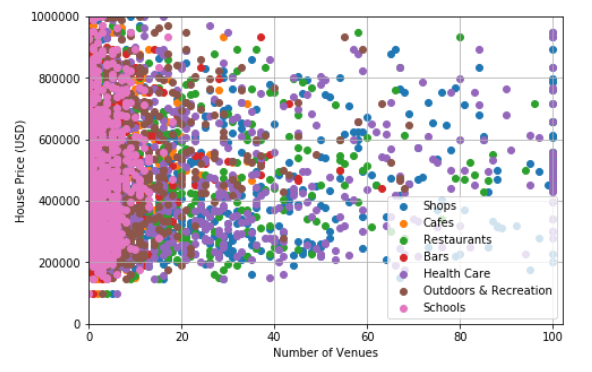

The correlations between the number of venues and the home price are less obvious. However, upon a close inspection, one can notice some correlations  between the price and number of Outdoors & Recreation facilities.

### 3.3. Model evaluation

The performance of all models was evaluated by computing Residual Mean Squared (RMS) and R^2 scores using k-fold splitting of the initial dataset into training  and testing subsets, and running over 100 splitting realizations to get the accurate estimations.

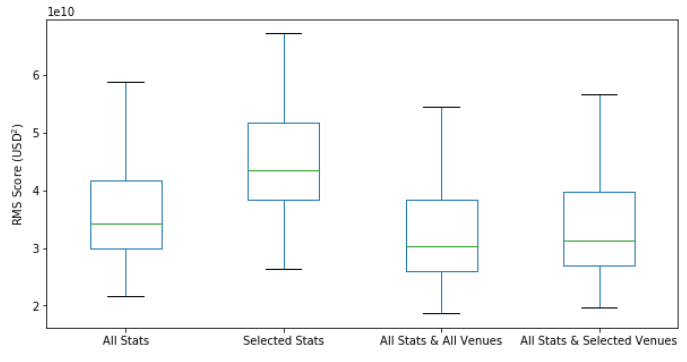

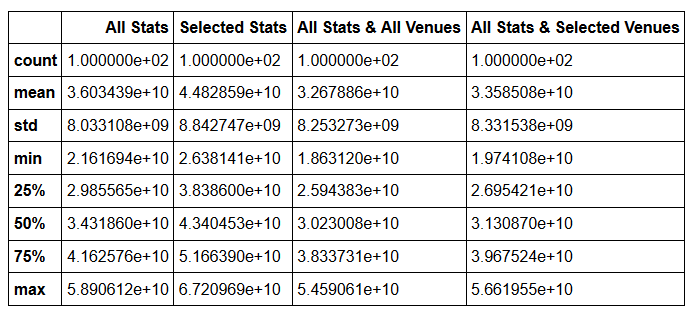

It is obvious that RMS score is reduced for the models that include venue features.

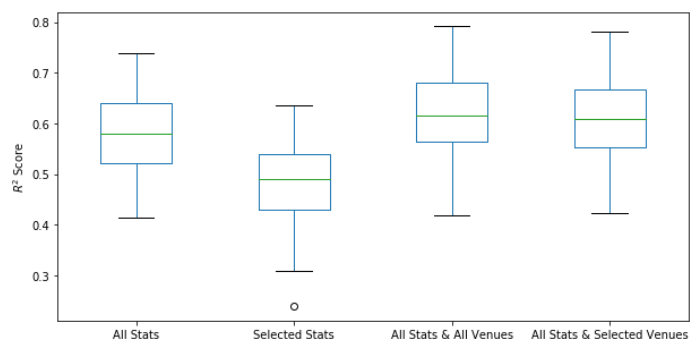


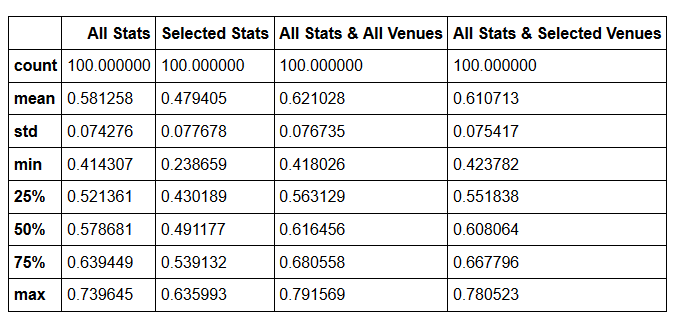


First of all, it important to note that exclusion of poorly correlated features (from All Stats to Selected Stats) leads to significant reduction of model performance.

Also, it is clear that R^2 improves when the venue information is included from about 0.58 to 0.62. While the improvement might not be that impressive it is obvious  that this improvement is comparable by magnitude with any difference in the R^2 score between two models that do not include any venue information, and between  the other two models that are different in selected venue features.

Thus, inspection of the RMS and R^2 scores confirms that removing redundant or highly-correlated features do  significantly reduce the model performance, while  adding some venue information can improve it. The performance scores favors model All Stats & All Venues as it provides the best performance.

The distribution plots of the actual and predicted prices give further insights into the performance of the best model.

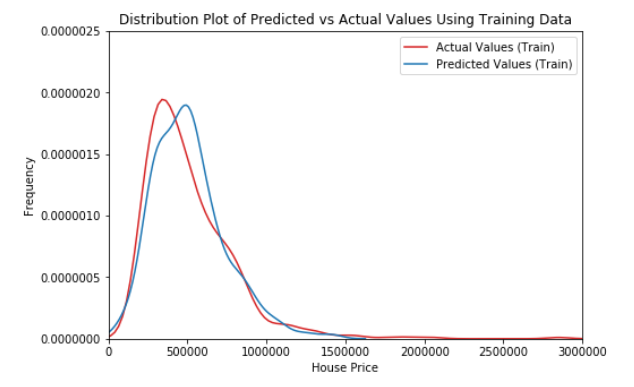 <br>
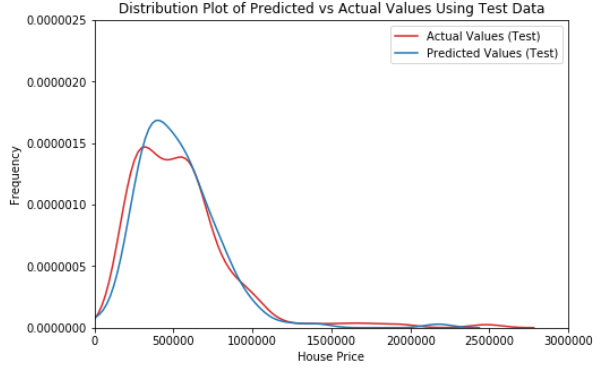

We can see that there are price regions, especially on the mid-range side, around $500,000 USD, that can benefit from further model improvements.

## 4. Results

From the model performance evaluations, it is clear that including the nearby venue data can improve the model performance.

For further insights into the best performing model, we can look into the model linear regression coefficients.

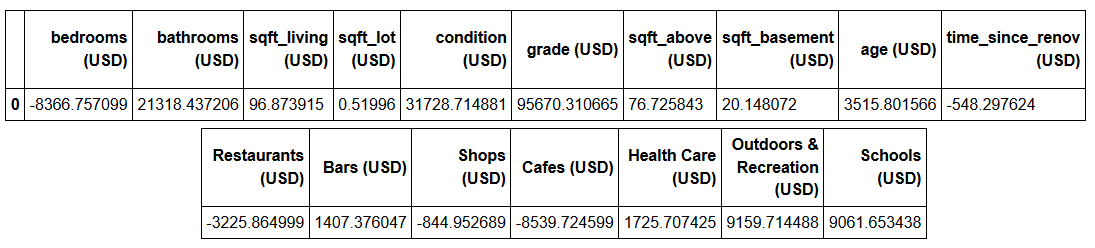

The meaning behind these coefficients is the added price value associated with each unit of the specific feature. We can see that not all features contribute equally,  even when they share the same measurement unit. More importantly, it appears that living area square footage and house grade are the most important price predictors.  The lot size and house condition are far less important predictors. And finally, homes that have more outdoors options nearby tend to be more expensive. The number of  dinning options may also drive the expected home price but the effect is less significant when it is compared to the contribution from the outdoors options.

## 5. Discussion

The analysis above shows that it is possible to build relatively successful home price prediction models using the linear regression approach. The performance of these models  can be improved by including the information about the number of venues nearby, more specifically, by including the number of outdoors and recreation facilities within a certain  distance. This result confirms that investing into urban infrastructure is a meaningful option for increasing the perceived value of the value of a residential properties.

While the given model is a static one for the most part and represents a time based snapshot, it is possible to enhance it to become more dynamic and addition of venus as  variables is a first step in a right direction. 

## 6. Conclusion

We have seen that including the number of nearby venues and, especially, the number of outdoors facilities improves the linear  regression model performance. The improvement  is relatively small but the effect is robust: the urban infrastructure  is clearly priced-in into the housing market. Not all the factors contribute equally to the home prices. The regression   models can provide some directions for the  infrastructure development.

## 7. Futher improvements

The regression model presented here can be improved further. Obviously, it might be beneficial to do a more detailed analysis of the venue types, filter the venue dataset to  avoid  double-counting,  and remove any other inconsistencies. The 1 km radius used in this study could be optimized for better performance. Exploring residuals may reveal some important non-linear behavior that potentially can be included into the model.  Also, crime data may be very useful if tied-in geographically. Time component may be included and some dinamical features like general economy performance or aggregate housing market index could be used to improve the model performance with time. Finally, clustering techniques applied to the dataset might reveal  extra insights into the common factors that influence the home prices.

## References

1. [The economic value of neighborhoods: Predicting real estate prices from the urban environment ](https://www.researchgate.net/publication/326914228_The_Economic_Value_of_Neighborhoods_Predicting_Real_Estate_Prices_from_the_Urban_Environment)
2. [Kaggle.com ](http://Kaggle.com)
3. [Google Search](http://google.com)
4. [Foursquare API](https://foursquare.com/developers)
